In [25]:
from warnings import filterwarnings
filterwarnings('ignore')

In [26]:
import pandas as pd
import numpy as np

In [27]:
cac40 = pd.read_html('https://en.wikipedia.org/wiki/CAC_40')[4]
cac40

,Company,Sector,GICS Sub-Industry,Ticker
0,Air Liquide,Basic Materials,Industrial Gases,AI.PA
1,Airbus,Industrials,Aerospace & Defense,AIR.PA
2,Alstom,Industrials,Rail Transport,ALO.PA
3,ArcelorMittal,Basic Materials,Steel,MT.AS
4,AXA,Financial Services,Life & Health Insurance,CS.PA
5,BNP Paribas,Financial Services,Diversified Banks,BNP.PA
6,Bouygues,Industrials,Construction & Engineering,EN.PA
7,Capgemini,Technology,IT Consulting & Other Services,CAP.PA
8,Carrefour,Consumer Defensive,Hypermarkets & Super Centers,CA.PA
9,Crédit Agricole,Financial Services,Regional Banks,ACA.PA


In [28]:
Tickers = cac40.iloc[[12,34], [3]]
symbols = Tickers['Ticker'].to_list()
symbols

['ENGI.PA', 'TTE.PA']

In [29]:
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

In [30]:
end = dt.datetime.now()
start = end-dt.timedelta(days = 3652)
start

datetime.datetime(2013, 2, 7, 15, 40, 36, 239959)

In [31]:
Engie = pdr.get_data_yahoo(symbols[0],start,end)['Adj Close']
Total = pdr.get_data_yahoo(symbols[1],start,end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [32]:
Engie

Date
2013-02-07     7.248947
2013-02-08     7.263711
2013-02-11     7.327686
2013-02-12     7.367055
2013-02-13     7.344910
                ...    
2023-02-01    13.152000
2023-02-02    12.912000
2023-02-03    13.096000
2023-02-06    13.030000
2023-02-07    12.914000
Name: Adj Close, Length: 2562, dtype: float64

In [33]:
Total

Date
2013-02-07    21.102510
2013-02-08    21.088774
2013-02-11    20.967892
2013-02-12    21.077793
2013-02-13    21.157457
                ...    
2023-02-01    55.970001
2023-02-02    55.180000
2023-02-03    56.349998
2023-02-06    55.660000
2023-02-07    56.939999
Name: Adj Close, Length: 2562, dtype: float64

In [34]:
from statsmodels.tsa.stattools import adfuller

result1 = adfuller(Engie.dropna())
print(f"ADF statistic : {result1[0]}")
print(f"p value : {result1[1]}")

ADF statistic : -3.383152651456604
p value : 0.01154678077896059


In [35]:
result2 = adfuller(Total.dropna())
print(f"ADF statistic : {result2[0]}")
print(f"p value : {result2[1]}")

ADF statistic : -0.6177078423965486
p value : 0.8669303691303314


In [36]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

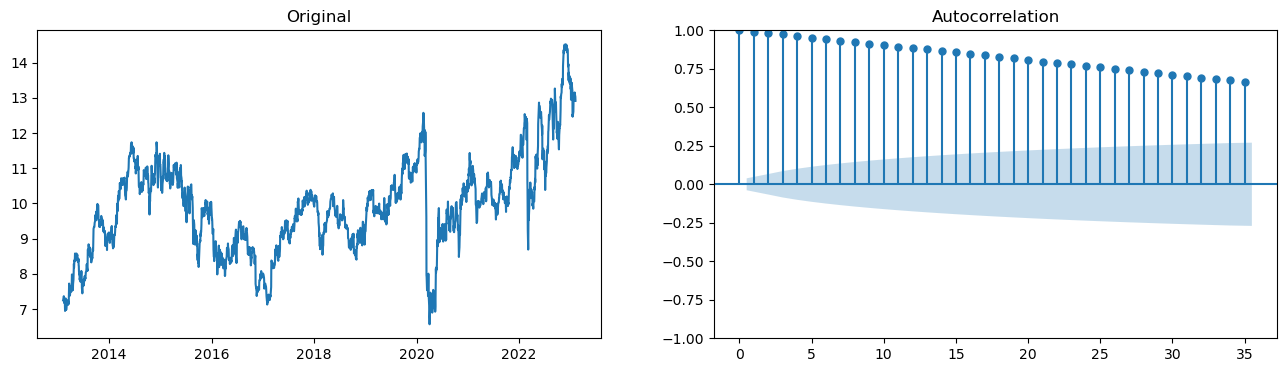

In [37]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))

ax1.plot(Engie)
ax1.set_title('Original')
plot_acf(Engie,ax=ax2);

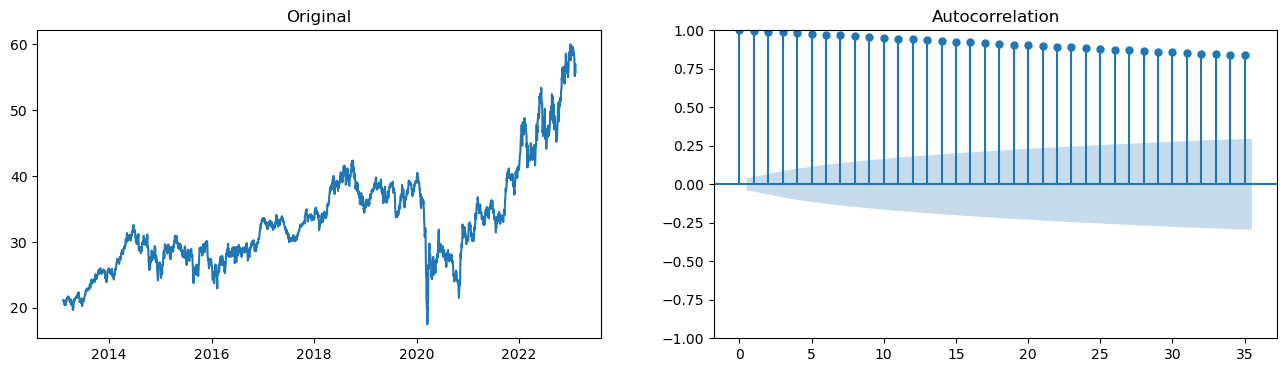

In [38]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))

ax1.plot(Total)
ax1.set_title('Original')
plot_acf(Total,ax=ax2);

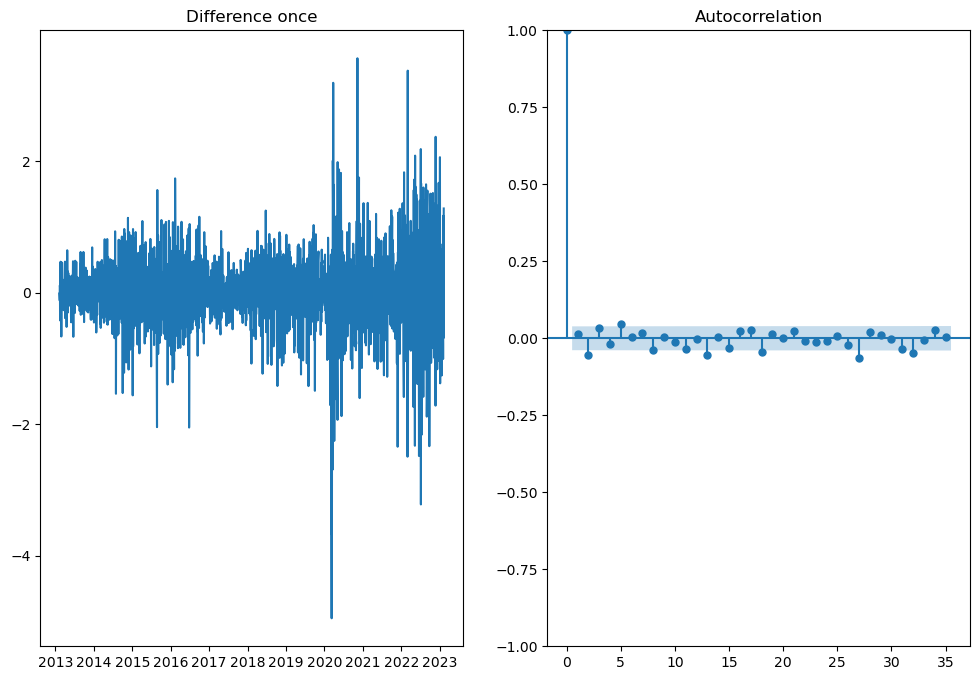

In [53]:
diff = Total.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

ax1.plot(diff)
ax1.set_title('Difference once')
plot_acf(diff, ax=ax2);

In [47]:
from pmdarima.arima.utils import ndiffs

In [49]:
ndiffs(Engie, test ='adf')

0

In [50]:
ndiffs(Total, test ='adf')

1

In [54]:
# P
# P is the order of the Auto Regressive (AR) term. It refers to the number of lags to be used as predictors
# We can find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.
# The partial autocorrelation represents the correlation between the series and its lags

In [55]:
from statsmodels.graphics.tsaplots import plot_pacf

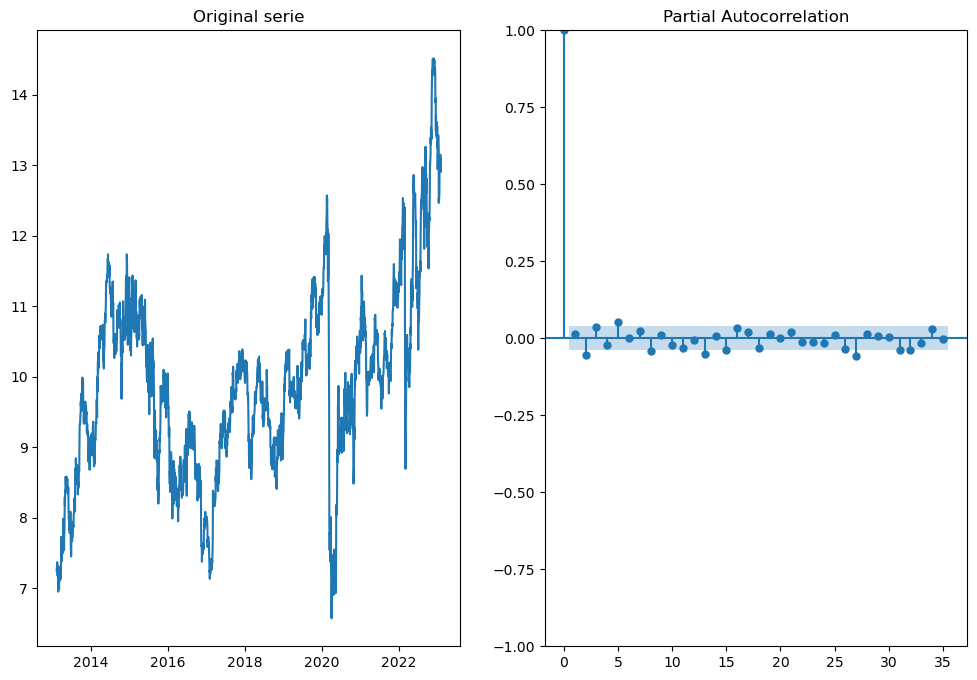

In [61]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

ax1.plot(Engie)
ax1.set_title('Original serie')
ax2.set_ylim(0,1)
plot_pacf(diff, ax=ax2);